# The Spark Foundation
## Graduate Rotational Internship Program - July2021
### Data Science and business analytics Intern
#### Task 2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
#### By: Sahil Tomar

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
import warnings as w

pd.options.plotting.backend = 'plotly'
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_online()
w.filterwarnings('ignore')

In [49]:
import plotly.io as pio

pio.renderers.default = "svg"

### Loading the data

from sklearn.datasets module, we are going to load iris dataset.

In [50]:
from sklearn.datasets import load_iris

#creating the instance for load_iris()
iris = load_iris()

#printing the keys for iris.
print("Keys =>",iris.keys())

#printing the detail hold by iris dataset.
print("\nDetails: \n",iris.DESCR)

Keys => dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Details: 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
   

### Making our dataset using pd.Dataframe

In [51]:
_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#showing first 5 rows of our dataset.
_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### We are adding the species column in dataset to indentify the type of species.

0 -> Iris-Setosa

1 -> Iris-Versicolour

2 -> Iris-Virginica



In [52]:
_df['species'] = iris.target
_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
# To check that weather we are correct or not about the species variable.
_df['species'].unique()

array([0, 1, 2])

### Analyzing the Dataframe: 

In [54]:
_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

we have no missing values in our dataset.i.e. Data is clean.

In [55]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


we can see that all our features are of numerical format.

In [56]:
_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


### Visualizing the dataframe:

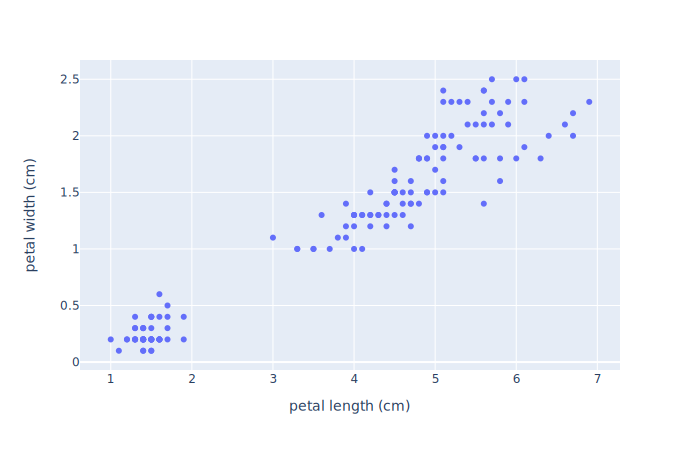

In [57]:
px.scatter(_df, x = 'petal length (cm)', y = 'petal width (cm)')

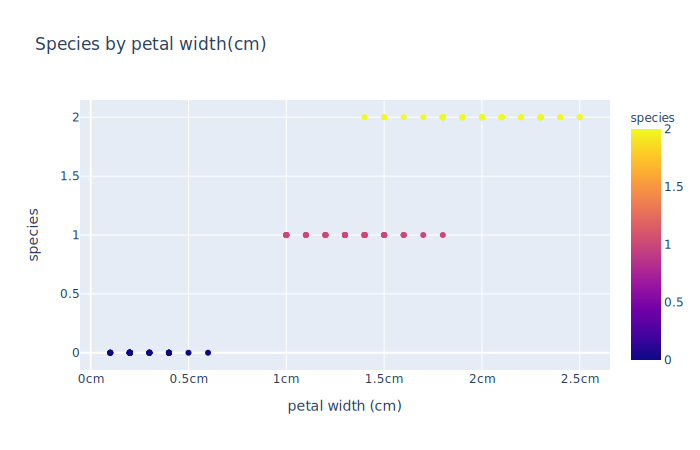

In [58]:
fig = px.scatter(data_frame=_df, x = 'petal width (cm)', y = 'species', color = 'species',
                title="Species by petal width(cm)",
                width=800, height=600)

fig.update_xaxes( # the y-axis is in dollars
    ticksuffix="cm", showgrid=True
)
fig.update_layout( # customize font and legend orientation & position
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    )
)
fig.show()


## Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

we are going to use k-means cluster for finding the optimum no. of clusters for our dataset

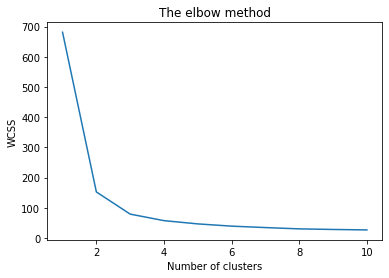

In [59]:
# Finding the optimum number of clusters for k-means classification

x = _df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### since we get our first slight change in curve b/w 3-4. So our optimum clusters = 3. This is because the **within cluster sum of squares ** (WCSS) doesn't decrease significantly with every iteration.


In [60]:
#Creating the kmeans classifier for n_cluster = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

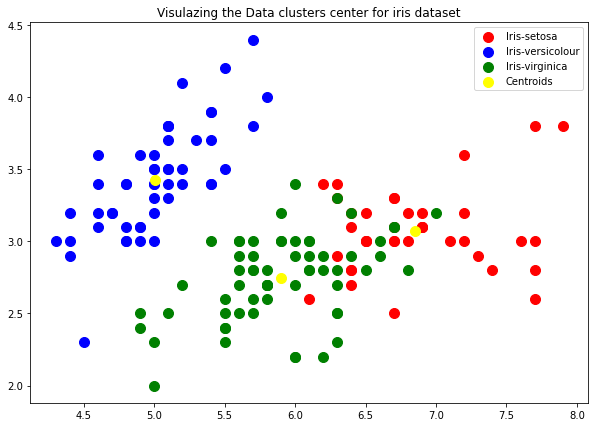

In [61]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title("Visulazing the Data clusters center for iris dataset")
plt.legend()
plt.show()

## we are able to predict the cluster numbers for iris dataset.

### Ans: Optimum clusters = 3

# Thank you!!